In [6]:
cd /Users/sarahbennett/Desktop/SROPproject/data/raw

/Users/sarahbennett/Desktop/SROPproject/data/raw


In [4]:
conda install conda=23.5.0
conda install matplotlib
conda install seaborn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## read file into dataframe

In [288]:
raw_data = pd.read_csv('TAORF-L1000-profiles.csv')

In [171]:
raw_data

,Unnamed: 0,PERT,Symbol,NCBIGeneID,200814_at,218597_s_at,217140_s_at,209253_at,214404_x_at,222103_at,...,207700_s_at,209112_at,202996_at,204420_at,211071_s_at,203341_at,202801_at,217398_x_at,205379_at,203897_at
0,0,BRDN0000464846,CEBPA,1050.0,-1.194166,2.238077,0.754850,-0.640921,0.225559,-1.111680,...,1.073681,-0.212018,0.637268,-0.018190,-2.020884,2.158755,0.688564,-0.601384,0.416310,0.120169
1,1,BRDN0000464847,CEBPA,1050.0,-0.428187,4.087896,-0.299040,-0.999700,-0.150459,-0.613517,...,0.730451,-0.175676,0.384687,-0.967703,-0.657547,2.283062,-0.098673,-0.528639,0.745521,-0.288377
2,2,BRDN0000464852,YAP1,10413.0,-0.815360,-0.810061,-0.602760,0.581827,0.634038,0.388235,...,1.603135,-0.095287,-0.178025,0.026362,-0.890987,0.320008,-0.543859,0.014386,0.413323,-1.589552
3,3,BRDN0000464853,APC,324.0,0.438179,0.589533,-0.301783,0.456332,-0.452433,-1.132039,...,0.717137,-0.558980,-0.730818,-0.468071,-1.169546,1.577006,-0.901837,-2.323484,0.139007,-0.204410
4,4,BRDN0000464855,CSNK1A1,1452.0,1.324805,0.417802,-0.574241,-0.523841,0.374933,-0.527300,...,0.004418,0.190266,-0.290716,0.578842,-0.365328,-0.545885,0.296013,0.672973,0.335795,-0.077003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,BRDN0000464990,HRAS,3265.0,-3.560181,-0.421909,0.574199,-1.519981,0.310194,0.402478,...,-0.932698,-1.655348,1.415550,2.555038,1.186383,0.969483,-1.900724,0.101624,-0.996339,1.016759
106,106,BRDN0000464991,MEK1,5604.0,0.453492,-0.458457,0.418105,0.409033,-1.282272,0.434436,...,-0.130560,0.174405,-0.776353,0.041641,-0.648840,-0.378609,-0.232731,-0.210868,1.654396,-1.702774
107,107,BRDN0000464992,AKT1,207.0,0.350350,-0.180406,0.574199,-0.632350,0.488848,-0.290078,...,-0.041239,0.345844,-0.703564,-0.244098,1.112339,0.241553,-1.836583,0.101624,-0.322154,0.700116
108,108,BRDN0000464994,ERG,2078.0,-0.501228,1.028693,-0.270585,0.918863,0.071601,-0.519173,...,1.170992,0.217113,1.475262,-1.256530,-0.343220,-1.103897,0.865213,0.702430,-0.178327,0.998305


## Make expression cluster map

In [289]:
# drop metadata columns
data = raw_data.drop(['PERT', 'Symbol', 'NCBIGeneID'], axis=1)
data = data.iloc[: , 1:]

/Users/sarahbennett/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


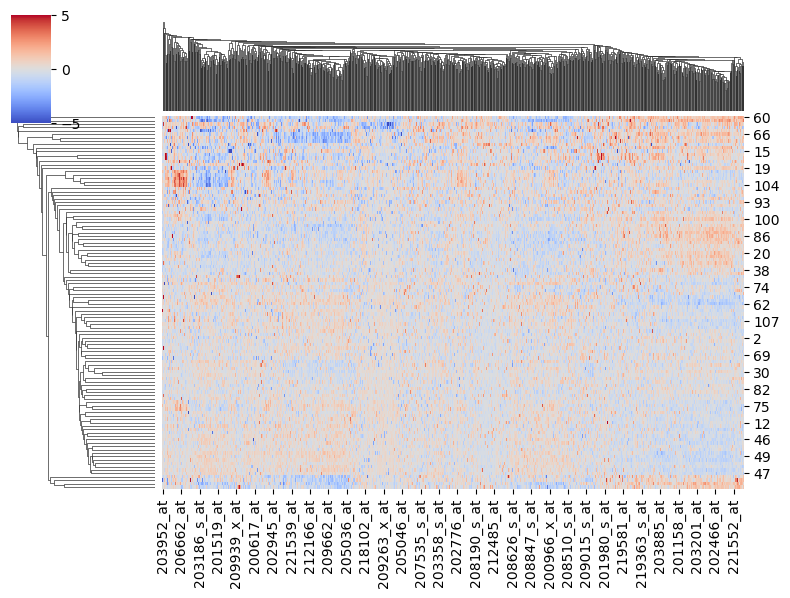

In [290]:
# make cluster map showing change in expression
sns.clustermap(data, figsize=(8,6), dendrogram_ratio=0.2, cmap='coolwarm', vmin=-5, vmax=5)

## make violin plot for expression data

In [291]:
# drop metadata columns
violin_data = raw_data.drop(['PERT', 'Symbol', 'NCBIGeneID'], axis=1)
violin_data = violin_data.iloc[: , 1:]

# create list of means and variances of each gene
mean_list = []
var_list = []
for column in violin_data:
    mean = violin_data[column].mean()
    var = violin_data[column].var()
    mean_list.append(mean)
    var_list.append(var)
    
# create dataframe out of means and variances
mean_var_data = {'Means': mean_list, 'Variances': var_list}
violin_plot_df = pd.DataFrame(mean_var_data)

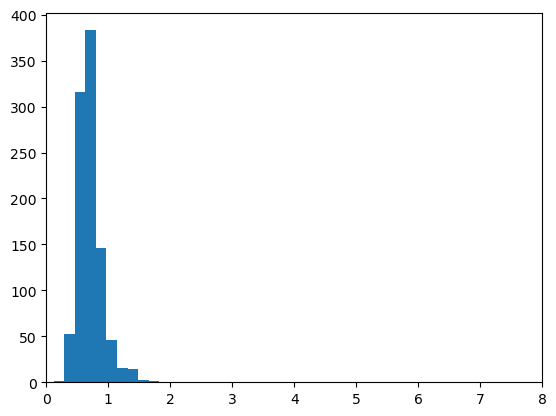

In [295]:
# create histogram showing the variances
plt.hist(var_list)
plt.xlim([0, 8])
plt.show()

In [296]:
# sort list of variances to see if any of them are 0
var_list.sort()
var_list

[0.11604090673324542,
 0.3068394745791138,
 0.3126598262545001,
 0.3340291416357672,
 0.3387643631596133,
 0.33899362450948284,
 0.344792714851133,
 0.35089108024499677,
 0.35134717472592464,
 0.35168725094474385,
 0.36713430287979426,
 0.37541814521977335,
 0.37861675650623666,
 0.3844747091749787,
 0.38522542994558984,
 0.38906392265104217,
 0.3944218182420749,
 0.39513118261465296,
 0.3960580639298217,
 0.39848511731525793,
 0.39930411826144435,
 0.3999519057743841,
 0.4007971606427591,
 0.4012570085374143,
 0.40540248994083594,
 0.4079742266396903,
 0.40837871513128177,
 0.41198683965670296,
 0.4158732979018691,
 0.4222260001016605,
 0.4234084539544096,
 0.4263688165027873,
 0.42762351891021794,
 0.4283224107132572,
 0.43065166574464997,
 0.430788131117226,
 0.4313287948681946,
 0.431774657993905,
 0.43300609993027156,
 0.43430865156685794,
 0.4366657812879157,
 0.4369259608475471,
 0.4377774038367477,
 0.4435455364156011,
 0.4445278986721884,
 0.44521093014966157,
 0.4452942421961

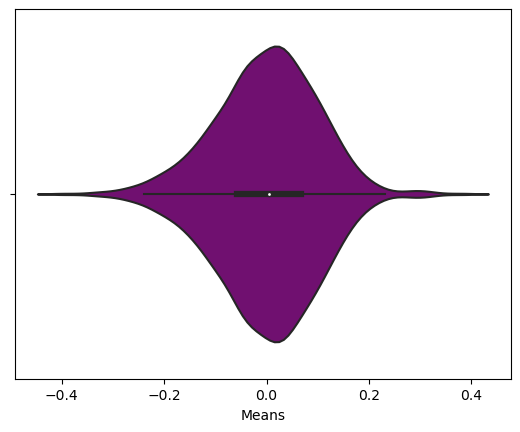

In [297]:
# make violin plot for means
mean_plot = sns.violinplot(data=violin_plot_df, x='Means', color='purple')

<Axes: xlabel='Variances'>

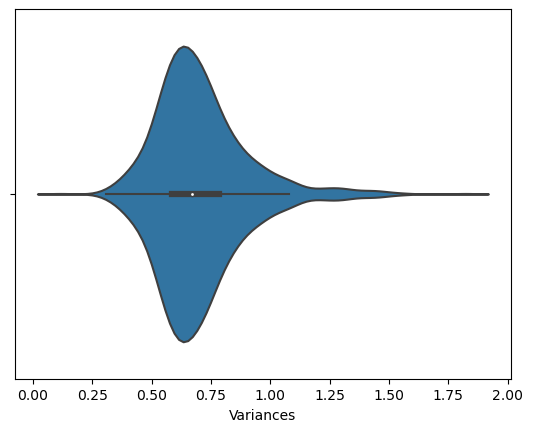

In [298]:
# make violin plot for variances
sns.violinplot(data=violin_plot_df, x='Variances')

## Run PCA on expression values

In [299]:
# make dataframe of expression values with gene id as the index
X = raw_data.drop(['PERT', 'Symbol'], axis=1)
X = X.set_index('NCBIGeneID')
X = X.iloc[: , 1:]

In [305]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [303]:
# scale expression values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [304]:
# run PCA on all original components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print('Shape before PCA: ', X_scaled.shape)
print('Shape after PCA: ', X_pca.shape)

Shape before PCA:  (110, 978)
Shape after PCA:  (110, 110)


Text(0, 0.5, 'Explained variance')

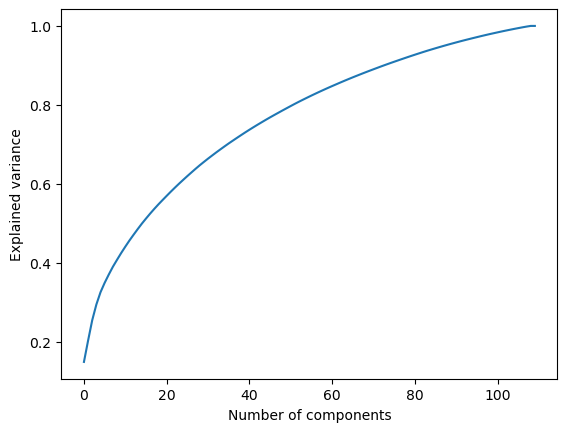

In [306]:
# plot cumulative explained variance of the components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

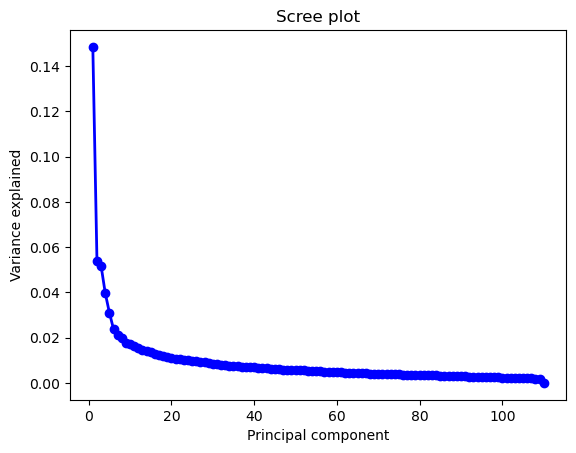

In [307]:
# make scree plot for PCA on all components
PC_values = np.arange(pca.n_components_)+1
plt.plot(PC_values, pca.explained_variance_ratio_,
        '-o', linewidth=2, color='blue')
plt.title('Scree plot')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.show()

In [308]:
# apply PCA to preserve 99.9999% variability of data
pca_99 = PCA(n_components=.99999)
X_pca_99 = pca_99.fit_transform(X_scaled)
X_pca_99.shape

(110, 109)

In [309]:
# make dataframe out of the reduced features
pca_df1000 = pd.DataFrame(data = X_pca)

# add gene ids to dataframe as a column
pca_df1000['NCBIGeneID'] = raw_data['NCBIGeneID']

## run experiments on reduced PCA data

In [310]:
# read file containing cell morphology labels
df_gene_labels = pd.read_csv('gene_labels_updated.csv')

In [311]:
# create dictionary for labels
geneID_to_label = {}

# make gene IDs the index
df_gene_labels.index = df_gene_labels['NCBIGeneID']

# add gene IDs and their corresponding labels to geneID_to_label dictionary
for gene_id in df_gene_labels['NCBIGeneID']:
    geneID_to_label[gene_id] = df_gene_labels.loc[gene_id, 'gene_label']
    
geneID_to_label[5604] = 'Negative'

# create ordered list that will form a new column for labels in the df1000 dataframe
label_column = []

for gene_id in pca_df1000['NCBIGeneID']:
    label_column.append(geneID_to_label[gene_id])
    
# add a column to L1000 dataframe using label_column list
pca_df1000['GeneLabel'] = label_column

# drop metadata columns from df1000
pca_df1000 = pca_df1000.drop('NCBIGeneID', axis=1)

In [312]:
# create list of index numbers of rows that are indeterminate
drop_list = []
index = 0
for label in pca_df1000['GeneLabel']:
    if label == 'Indeterminate':
        drop_list.append(index)
    index += 1

In [314]:
# make dataframe with expression values and labels for overall morphology change(not channel-specific_
pca_df1000_all = pca_df1000.drop(index = drop_list, axis=0)
pca_df1000_all = pca_df1000_all.reset_index().iloc[: , 1:]

In [318]:
# split data into features(X) and target(y)
X = pca_df1000_all.drop('GeneLabel', axis=1)
y = pca_df1000_all['GeneLabel']

# convert target variables to binary
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# overall(non-channel specific) data

## random forest

In [319]:
# assign model and cross validation folds
rf = RandomForestClassifier(n_estimators=1000)
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# predict class probabilities
rf_probs = cross_val_predict(rf, X, y_binary, cv=cv, method='predict_proba')

# keep only positive class probabilities
rf_probs = rf_probs[:, 1]

# assign FPR and TPR
rf_fpr, rf_tpr, _ = roc_curve(y_binary, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)
print(rf_auc)

0.6915064102564102


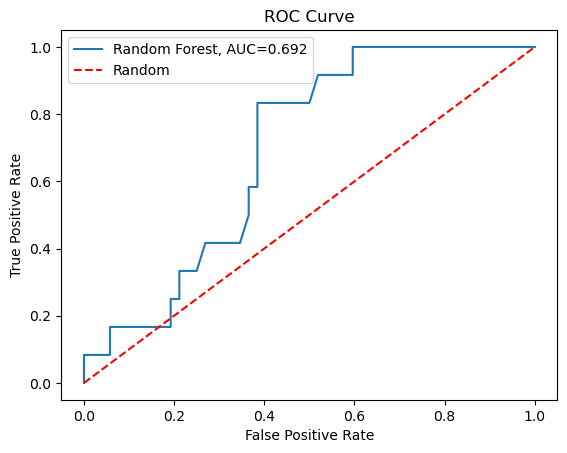

In [321]:
# plot roc curve for random forest on PCA reduced data
plt.plot(rf_fpr, rf_tpr, label='Random Forest, AUC='+str(round(rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## logistic regression

In [322]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [323]:
# assign model and cv folds
log_reg = LogisticRegression(random_state=16)
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# predict class probabilities
log_reg_probs = cross_val_predict(log_reg, X, y_binary, cv=cv, method='predict_proba')

# keep only positive class probabilities
log_reg_probs = log_reg_probs[:, 1]

# assign FPR and TPR
lr_fpr, lr_tpr, _ = roc_curve(y_binary, log_reg_probs)
lr_auc = auc(lr_fpr, lr_tpr)
print(lr_auc)

0.8878205128205128


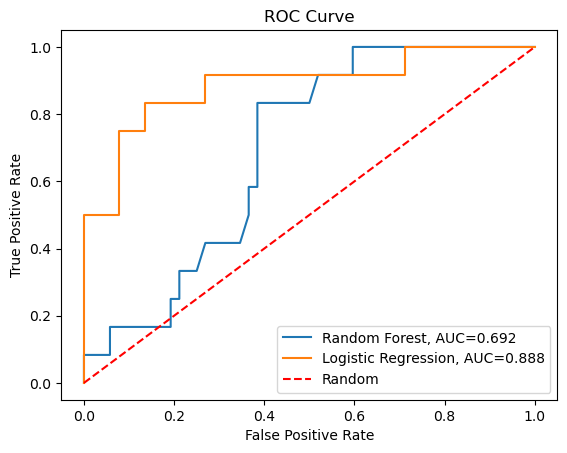

In [324]:
# plot roc curve for logistic regression with default parameters on PCA reduced data
plt.plot(rf_fpr, rf_tpr, label='Random Forest, AUC='+str(round(rf_auc, 3)))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression, AUC='+str(round(lr_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## logistic regression with L2 penalty and nested cv

In [325]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
import numpy as np
from sklearn.metrics import auc

In [326]:
# assign cv folds and C values to try
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
# for each outer fold, print best C value and training/test AUC
for train_index, test_index in cv.split(X, y):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv)     
    model.fit(x_train, y_train.values.ravel())

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.9
  
    

NestedCV: 2 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.9
  
    

NestedCV: 3 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.33333333333333337
  
    

NestedCV: 5 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 8 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9845261121856866
    Test
        AUC: 1.0
  
    

NestedCV: 9 of

In [327]:
# run nested cross validation
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv)  

# predict class probabilities
probs = cross_val_predict(model, X, y.values.ravel(), cv=cv, method='predict_proba')
probs = probs[:, 1]

cv_fpr, cv_tpr, _ = roc_curve(y, probs, pos_label='Positive')
cv_auc = auc(cv_fpr, cv_tpr)
print(cv_auc)

0.844551282051282


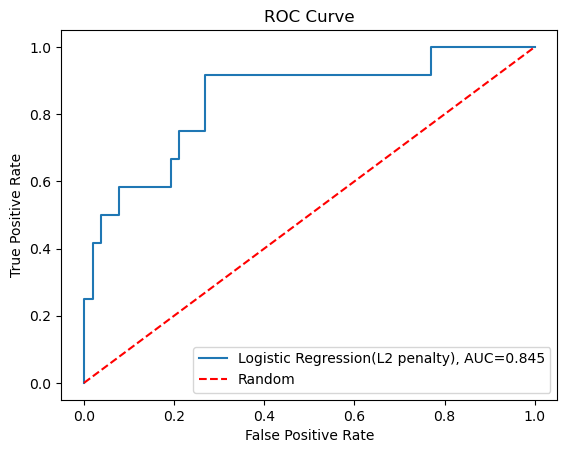

In [328]:
plt.plot(cv_fpr, cv_tpr, label='Logistic Regression(L2 penalty), AUC='+str(round(cv_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## logistic regression with L1 penalty and nested cv

In [329]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X, y):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv, penalty='l1', solver='liblinear')     
    model.fit(x_train, y_train.values.ravel())

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9914893617021278
    Test
        AUC: 0.8
  
    

NestedCV: 2 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9872340425531915
    Test
        AUC: 0.9
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9683794466403162
    Test
        AUC: 1.0
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9920948616600791
    Test
        AUC: 0.8333333333333334
  
    

NestedCV: 5 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9806576402321083
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9961315280464216
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9903288201160542
    Test
        AUC: 0.8
  
    

NestedCV: 8 of outer fold 10

    C value: [1.

In [330]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv, penalty='l1', solver='liblinear')  

l1_probs = cross_val_predict(model, X, y.values.ravel(), cv=cv, method='predict_proba')
l1_probs = l1_probs[:, 1]

cv_fpr1, cv_tpr1, _ = roc_curve(y, l1_probs, pos_label='Positive')
cv_auc1 = auc(cv_fpr1, cv_tpr1)
print(cv_auc1)

0.907051282051282


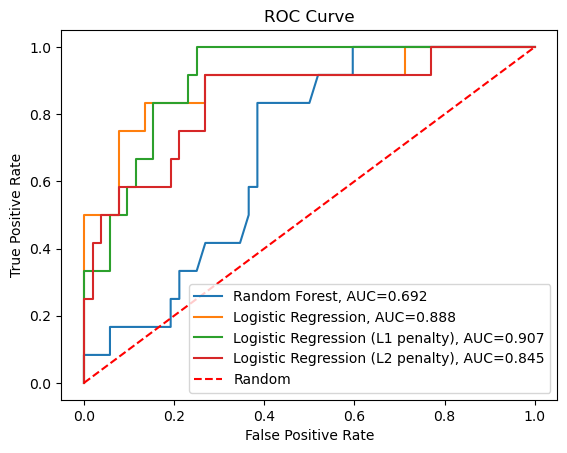

In [331]:
# plot roc curves for all algorithms with PCA reduced data(not channel-specific)
plt.plot(rf_fpr, rf_tpr, label='Random Forest, AUC='+str(round(rf_auc, 3)))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression, AUC='+str(round(lr_auc, 3)))
plt.plot(cv_fpr1, cv_tpr1, label='Logistic Regression (L1 penalty), AUC='+str(round(cv_auc1, 3)))
plt.plot(cv_fpr, cv_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(cv_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('roc_pca_alldata.png')
plt.show()

# channel-specific experiments

In [332]:
# read file containing cell morphology labels by channel
df_channel_labels = pd.read_csv('gene_channel_labels.csv')

In [334]:
# add gene id column back to reduced expression value dataframe
pca_df1000['NCBIGeneID'] = raw_data['NCBIGeneID']

In [335]:
# create dictionaries for each channel and their labels
mito_dict = {}
er_dict = {}
rna_dict = {}
agp_dict = {}
dna_dict = {}

# make gene IDs the index
df_channel_labels.index = df_channel_labels['NCBIGeneID']

# add gene IDs and their corresponding labels to channel dictionaries
for gene_id in df_channel_labels['NCBIGeneID']:
    mito_dict[gene_id] = df_channel_labels.loc[gene_id, 'Mito']
    er_dict[gene_id] = df_channel_labels.loc[gene_id, 'ER']
    rna_dict[gene_id] = df_channel_labels.loc[gene_id, 'RNA']
    agp_dict[gene_id] = df_channel_labels.loc[gene_id, 'AGP']
    dna_dict[gene_id] = df_channel_labels.loc[gene_id, 'DNA']

# add correct label for gene id 5604
mito_dict[5604] = 'Negative'
er_dict[5604] = 'Negative'
rna_dict[5604] = 'Negative'
agp_dict[5604] = 'Negative'
dna_dict[5604] = 'Negative'

In [336]:
# create ordered lists that will form new columns for channel labels in the df1000 dataframe
mito_col = []
er_col =[]
rna_col = []
agp_col = []
dna_col = []

for gene_id in pca_df1000['NCBIGeneID']:
    mito_col.append(mito_dict[gene_id])
    er_col.append(er_dict[gene_id])
    rna_col.append(rna_dict[gene_id])
    agp_col.append(agp_dict[gene_id])
    dna_col.append(dna_dict[gene_id])
    
# add columns to L1000 dataframe using lists
pca_df1000['Mito'] = mito_col
pca_df1000['ER'] = er_col
pca_df1000['RNA'] = rna_col
pca_df1000['AGP'] = agp_col
pca_df1000['DNA'] = dna_col

# drop column with overall morphology labels
pca_df1000 = pca_df1000.drop('GeneLabel', axis=1)

In [337]:
# create list of index numbers of mito rows that are indeterminate
mito_drop = []
index = 0
for label in pca_df1000['Mito']:
    if label == 'Inteterminate':
        mito_drop.append(index)
    index += 1

# create list of index numbers of mito rows that are indeterminate
er_drop = []
index = 0
for label in pca_df1000['ER']:
    if label == 'Inteterminate':
        er_drop.append(index)
    index += 1

# create list of index numbers of rna rows that are indeterminate
rna_drop = []
index = 0
for label in pca_df1000['RNA']:
    if label == 'Inteterminate':
        rna_drop.append(index)
    index += 1
    
# create list of index numbers of mito rows that are indeterminate
agp_drop = []
index = 0
for label in pca_df1000['AGP']:
    if label == 'Inteterminate':
        agp_drop.append(index)
    index += 1
    
# create list of index numbers of mito rows that are indeterminate
dna_drop = []
index = 0
for label in pca_df1000['DNA']:
    if label == 'Inteterminate':
        dna_drop.append(index)
    index += 1

## make mito df

In [339]:
# drop other channel columns and rows for which label is indeterminate
pca_df1000_mito = pca_df1000.drop(['NCBIGeneID', 'ER', 'DNA', 'RNA', 'AGP'], axis=1)
pca_df1000_mito = pca_df1000_mito.drop(index = mito_drop, axis=0)
pca_df1000_mito = pca_df1000_mito.reset_index()
pca_df1000_mito = pca_df1000_mito.drop('index', axis=1)

# split data into features(X) and target(y)
X_mito = pca_df1000_mito.drop('Mito', axis=1)
y_mito = pca_df1000_mito['Mito']

# convert target variables to binary
label_encoder = LabelEncoder()
y_mito_binary = label_encoder.fit_transform(y_mito)

## make er df

In [341]:
# drop other channel columns and rows for which label is indeterminate
pca_df1000_er = pca_df1000.drop(['NCBIGeneID', 'Mito', 'DNA', 'RNA', 'AGP'], axis=1)
pca_df1000_er = pca_df1000_er.drop(index = er_drop, axis=0)
pca_df1000_er = pca_df1000_er.reset_index()
pca_df1000_er = pca_df1000_er.drop('index', axis=1)

# split data into features(X) and target(y)
X_er = pca_df1000_er.drop('ER', axis=1)
y_er = pca_df1000_er['ER']

# convert target variables to binary
label_encoder = LabelEncoder()
y_er_binary = label_encoder.fit_transform(y_er)

## make rna df

In [342]:
# drop other channel columns and rows for which label is indeterminate
pca_df1000_rna = pca_df1000.drop(['NCBIGeneID', 'Mito', 'DNA', 'ER', 'AGP'], axis=1)
pca_df1000_rna = pca_df1000_rna.drop(index = rna_drop, axis=0)
pca_df1000_rna = pca_df1000_rna.reset_index()
pca_df1000_rna = pca_df1000_rna.drop('index', axis=1)

# split data into features(X) and target(y)
X_rna = pca_df1000_rna.drop('RNA', axis=1)
y_rna = pca_df1000_rna['RNA']

# convert target variables to binary
label_encoder = LabelEncoder()
y_rna_binary = label_encoder.fit_transform(y_rna)

## make agp df

In [343]:
# drop other channel columns and rows for which label is indeterminate
pca_df1000_agp = pca_df1000.drop(['NCBIGeneID', 'Mito', 'DNA', 'ER', 'RNA'], axis=1)
pca_df1000_agp = pca_df1000_agp.drop(index = agp_drop, axis=0)
pca_df1000_agp = pca_df1000_agp.reset_index()
pca_df1000_agp = pca_df1000_agp.drop('index', axis=1)

# split data into features(X) and target(y)
X_agp = pca_df1000_agp.drop('AGP', axis=1)
y_agp = pca_df1000_agp['AGP']

# convert target variables to binary
label_encoder = LabelEncoder()
y_agp_binary = label_encoder.fit_transform(y_agp)

## make dna df

In [345]:
# drop other channel columns and rows for which label is indeterminate
pca_df1000_dna = pca_df1000.drop(['NCBIGeneID', 'Mito', 'AGP', 'ER', 'RNA'], axis=1)
pca_df1000_dna = pca_df1000_dna.drop(index = dna_drop, axis=0)
pca_df1000_dna = pca_df1000_dna.reset_index()
pca_df1000_dna = pca_df1000_dna.drop('index', axis=1)

# split data into features(X) and target(y)
X_dna = pca_df1000_dna.drop('DNA', axis=1)
y_dna = pca_df1000_dna['DNA']

# convert target variables to binary
label_encoder = LabelEncoder()
y_dna_binary = label_encoder.fit_transform(y_dna)

## learn random forest for channel-specific labels

In [346]:
# assign model and cv folds
rf = RandomForestClassifier(n_estimators=1000)
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

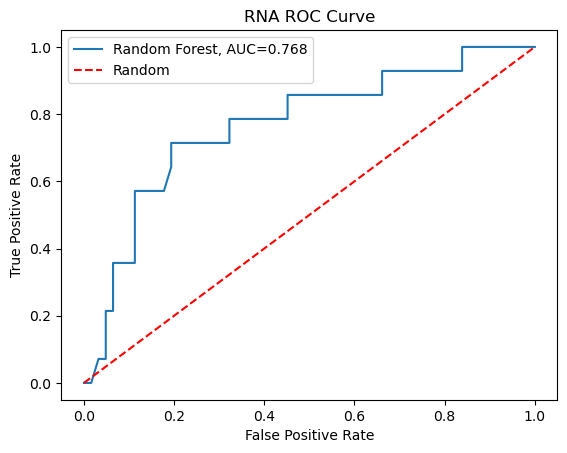

In [347]:
# for rna

# predict class probabilities
r_rf_probs = cross_val_predict(rf, X_rna, y_rna_binary, cv=cv, method='predict_proba')
r_rf_probs = r_rf_probs[:, 1]

# assign FPR and TPR
r_rf_fpr, r_rf_tpr, _ = roc_curve(y_rna_binary, r_rf_probs)
r_rf_auc = auc(r_rf_fpr, r_rf_tpr)

# plot roc curve
plt.plot(r_rf_fpr, r_rf_tpr, label='Random Forest, AUC='+str(round(r_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNA ROC Curve')
plt.legend()
plt.show()

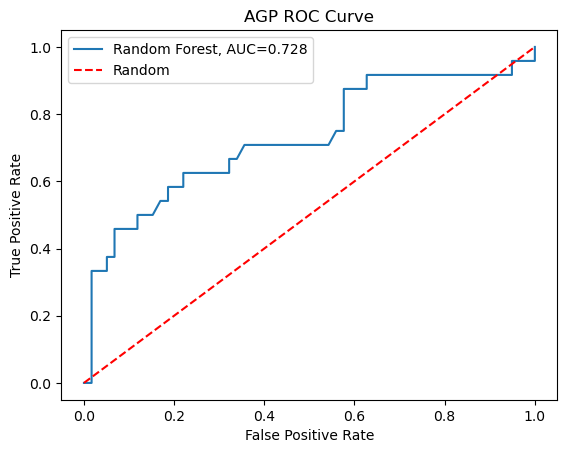

In [348]:
# for agp

# predict class probabilities
a_rf_probs = cross_val_predict(rf, X_agp, y_agp_binary, cv=cv, method='predict_proba')
a_rf_probs = a_rf_probs[:, 1]

# assign FPR and TPR
a_rf_fpr, a_rf_tpr, _ = roc_curve(y_agp_binary, a_rf_probs)
a_rf_auc = auc(a_rf_fpr, a_rf_tpr)

# plot roc curve
plt.plot(a_rf_fpr, a_rf_tpr, label='Random Forest, AUC='+str(round(a_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AGP ROC Curve')
plt.legend()
plt.show()

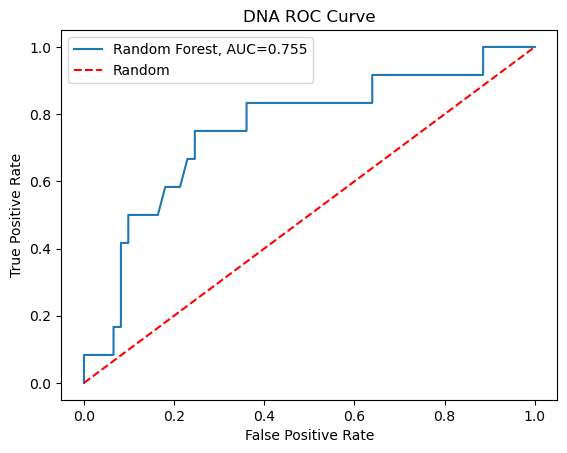

In [349]:
# for dna

# predict class probabilities
d_rf_probs = cross_val_predict(rf, X_dna, y_dna_binary, cv=cv, method='predict_proba')
d_rf_probs = d_rf_probs[:, 1]

# assign FPR and TPR
d_rf_fpr, d_rf_tpr, _ = roc_curve(y_dna_binary, d_rf_probs)
d_rf_auc = auc(d_rf_fpr, d_rf_tpr)

# plot roc curve
plt.plot(d_rf_fpr, d_rf_tpr, label='Random Forest, AUC='+str(round(d_rf_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNA ROC Curve')
plt.legend()
plt.show()

## learn logistic regression models(default parameters) for channel-specific labels

In [350]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [351]:
# assign model and cv folds
lr = LogisticRegression(random_state=16)
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

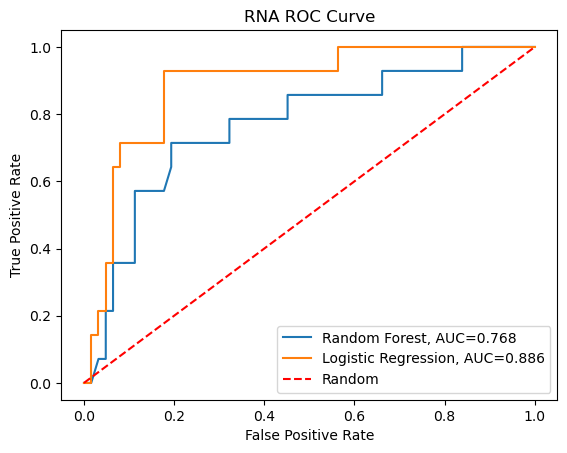

In [352]:
# rna
r_lr_probs = cross_val_predict(lr, X_rna, y_rna_binary, cv=cv, method='predict_proba')
r_lr_probs = r_lr_probs[:, 1]
r_lr_fpr, r_lr_tpr, _ = roc_curve(y_rna_binary, r_lr_probs)
r_lr_auc = auc(r_lr_fpr, r_lr_tpr)

plt.plot(r_rf_fpr, r_rf_tpr, label='Random Forest, AUC='+str(round(r_rf_auc, 3)))
plt.plot(r_lr_fpr, r_lr_tpr, label='Logistic Regression, AUC='+str(round(r_lr_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNA ROC Curve')
plt.legend()
plt.show()

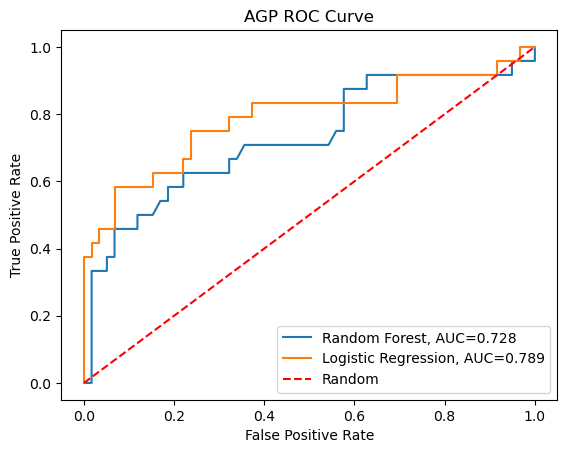

In [353]:
# agp
a_lr_probs = cross_val_predict(lr, X_agp, y_agp_binary, cv=cv, method='predict_proba')
a_lr_probs = a_lr_probs[:, 1]
a_lr_fpr, a_lr_tpr, _ = roc_curve(y_agp_binary, a_lr_probs)
a_lr_auc = auc(a_lr_fpr, a_lr_tpr)

plt.plot(a_rf_fpr, a_rf_tpr, label='Random Forest, AUC='+str(round(a_rf_auc, 3)))
plt.plot(a_lr_fpr, a_lr_tpr, label='Logistic Regression, AUC='+str(round(a_lr_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AGP ROC Curve')
plt.legend()
plt.show()

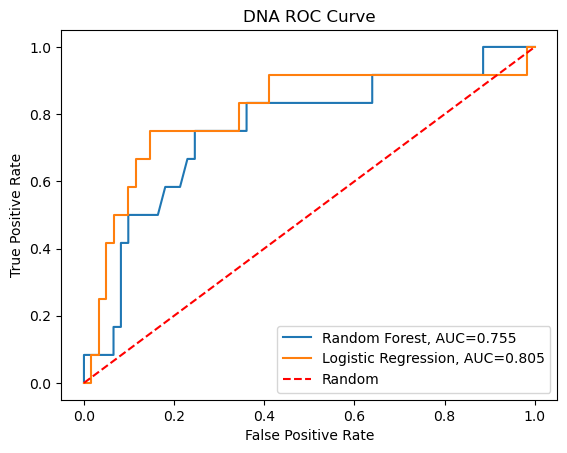

In [354]:
# dna
d_lr_probs = cross_val_predict(lr, X_dna, y_dna_binary, cv=cv, method='predict_proba')
d_lr_probs = d_lr_probs[:, 1]
d_lr_fpr, d_lr_tpr, _ = roc_curve(y_dna_binary, d_lr_probs)
d_lr_auc = auc(d_lr_fpr, d_lr_tpr)

plt.plot(d_rf_fpr, d_rf_tpr, label='Random Forest, AUC='+str(round(d_rf_auc, 3)))
plt.plot(d_lr_fpr, d_lr_tpr, label='Logistic Regression, AUC='+str(round(d_lr_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNA ROC Curve')
plt.legend()
plt.show()

## logistic regression with L2 penalty and nested cv

In [355]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
import numpy as np
from sklearn.metrics import auc, roc_auc_score

In [266]:
# for Mito

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_mito, y_mito):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_mito.loc[train_index], X_mito.loc[test_index]
    y_train, y_test = y_mito.loc[train_index], y_mito.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv)     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))

/Users/sarahbennett/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/sarahbennett/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/Users/sarahbennett/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/Users/sarahbennett/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/Users/sarahbennett/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 mem


NestedCV: 1 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 2 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 4 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 5 of outer fold 10


/Users/sarahbennett/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [356]:
# for rna

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_rna, y_rna):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_rna.loc[train_index], X_rna.loc[test_index]
    y_train, y_test = y_rna.loc[train_index], y_rna.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9836309523809524
    Test
        AUC: 1.0
  
    

NestedCV: 2 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.5833333333333334
  
    

NestedCV: 3 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.980654761904762
    Test
        AUC: 0.9166666666666667
  
    

NestedCV: 4 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9940476190476191
    Test
        AUC: 0.8333333333333334
  
    

NestedCV: 5 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9804195804195804
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9776223776223776
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9793956043956044
    Test
        AUC: 1.0
  
    

NestedCV: 8 of outer

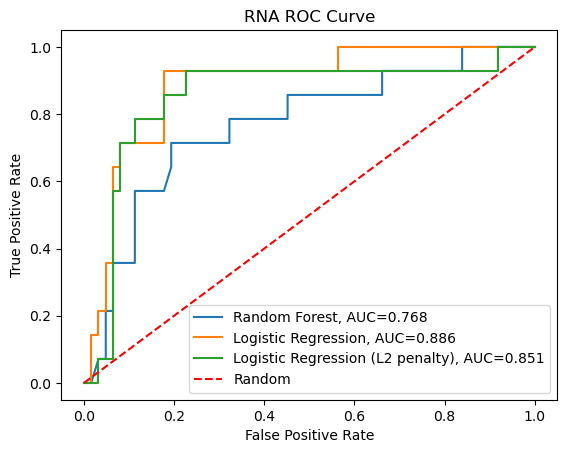

In [357]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv)  

rna_probs = cross_val_predict(model, X_rna, y_rna.values.ravel(), cv=cv, method='predict_proba')
rna_probs = rna_probs[:, 1]

rna_fpr, rna_tpr, _ = roc_curve(y_rna, rna_probs, pos_label='Positive')
rna_auc = auc(rna_fpr, rna_tpr)

plt.plot(r_rf_fpr, r_rf_tpr, label='Random Forest, AUC='+str(round(r_rf_auc, 3)))
plt.plot(r_lr_fpr, r_lr_tpr, label='Logistic Regression, AUC='+str(round(r_lr_auc, 3)))
plt.plot(rna_fpr, rna_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(rna_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNA ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [358]:
# for agp

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_agp, y_agp):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_agp.loc[train_index], X_agp.loc[test_index]
    y_train, y_test = y_agp.loc[train_index], y_agp.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.888888888888889
  
    

NestedCV: 2 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 3 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.8333333333333333
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.6666666666666666
  
    

NestedCV: 5 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.5
  
    

NestedCV: 6 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.9166666666666667
  
    

NestedCV: 7 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 8 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC:

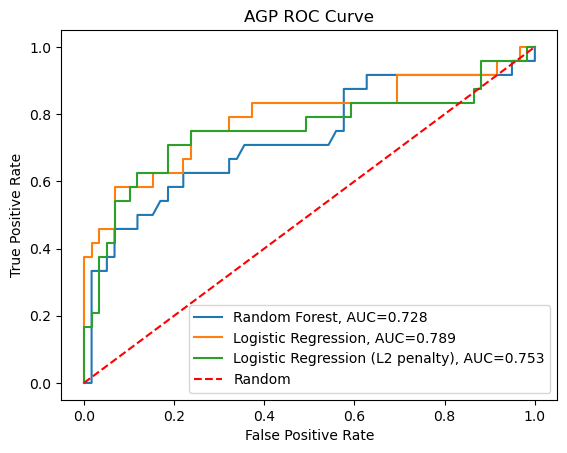

In [359]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv)  

agp_probs = cross_val_predict(model, X_agp, y_agp.values.ravel(), cv=cv, method='predict_proba')
agp_probs = agp_probs[:, 1]

agp_fpr, agp_tpr, _ = roc_curve(y_agp, agp_probs, pos_label='Positive')
agp_auc = auc(agp_fpr, agp_tpr)

plt.plot(a_rf_fpr, a_rf_tpr, label='Random Forest, AUC='+str(round(a_rf_auc, 3)))
plt.plot(a_lr_fpr, a_lr_tpr, label='Logistic Regression, AUC='+str(round(a_lr_auc, 3)))
plt.plot(agp_fpr, agp_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(agp_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AGP ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [360]:
# for dna

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_dna, y_dna):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_dna.loc[train_index], X_dna.loc[test_index]
    y_train, y_test = y_dna.loc[train_index], y_dna.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 2 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 3 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.8571428571428572
  
    

NestedCV: 4 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.0
  
    

NestedCV: 5 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [0.001]
    
    Training
        AUC: 0.9867768595041322
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 1.0
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 8 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 1.0
    Test
        AUC

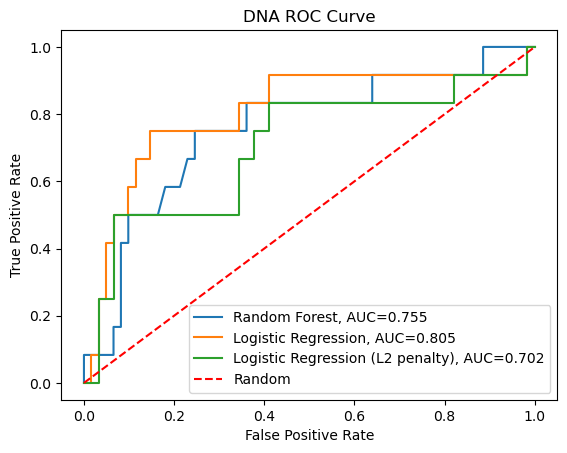

In [361]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv)  

dna_probs = cross_val_predict(model, X_dna, y_dna.values.ravel(), cv=cv, method='predict_proba')
dna_probs = dna_probs[:, 1]

dna_fpr, dna_tpr, _ = roc_curve(y_dna, dna_probs, pos_label='Positive')
dna_auc = auc(dna_fpr, dna_tpr)

plt.plot(d_rf_fpr, d_rf_tpr, label='Random Forest, AUC='+str(round(d_rf_auc, 3)))
plt.plot(d_lr_fpr, d_lr_tpr, label='Logistic Regression, AUC='+str(round(d_lr_auc, 3)))
plt.plot(dna_fpr, dna_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(dna_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNA ROC Curve')
plt.legend(loc='lower right')
plt.show()

## logistic regression with L1 penalty and nested cv

In [362]:
# for rna

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_rna, y_rna):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_rna.loc[train_index], X_rna.loc[test_index]
    y_train, y_test = y_rna.loc[train_index], y_rna.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc', solver='liblinear', penalty='l1')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9747023809523809
    Test
        AUC: 1.0
  
    

NestedCV: 2 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9672619047619049
    Test
        AUC: 0.5833333333333334
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9642857142857142
    Test
        AUC: 0.9166666666666667
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9866071428571429
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 5 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9706293706293707
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9766483516483517
    Test
        AUC: 1.0
  
    

NestedCV: 8 of outer fold 10

  

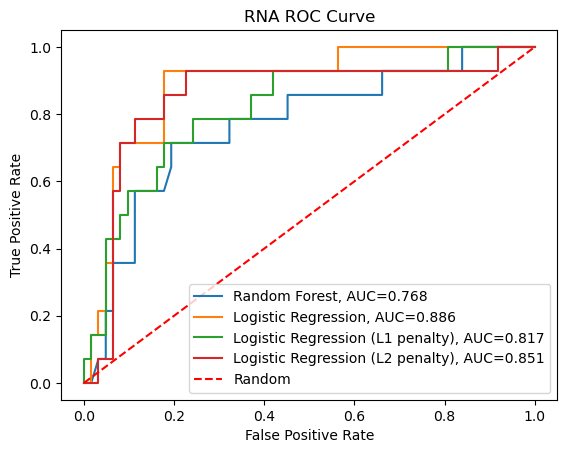

In [363]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv, penalty='l1', solver='liblinear')  

rna_probs1 = cross_val_predict(model, X_rna, y_rna.values.ravel(), cv=cv, method='predict_proba')
rna_probs1 = rna_probs1[:, 1]

rna_fpr1, rna_tpr1, _ = roc_curve(y_rna, rna_probs1, pos_label='Positive')
rna_auc1 = auc(rna_fpr1, rna_tpr1)

plt.plot(r_rf_fpr, r_rf_tpr, label='Random Forest, AUC='+str(round(r_rf_auc, 3)))
plt.plot(r_lr_fpr, r_lr_tpr, label='Logistic Regression, AUC='+str(round(r_lr_auc, 3)))
plt.plot(rna_fpr1, rna_tpr1, label='Logistic Regression (L1 penalty), AUC='+str(round(rna_auc1, 3)))
plt.plot(rna_fpr, rna_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(rna_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNA ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_pca_rna.png')
plt.show()

In [364]:
# for agp

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_agp, y_agp):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_agp.loc[train_index], X_agp.loc[test_index]
    y_train, y_test = y_agp.loc[train_index], y_agp.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc', solver='liblinear', penalty='l1')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9640610961365679
    Test
        AUC: 0.7777777777777778
  
    

NestedCV: 2 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9604672057502246
    Test
        AUC: 0.888888888888889
  
    

NestedCV: 3 of outer fold 10

    C value: [1.]
    
    Training
        AUC: 1.0
    Test
        AUC: 1.0
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9735449735449735
    Test
        AUC: 0.5333333333333333
  
    

NestedCV: 5 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 0.8387650085763294
    Test
        AUC: 0.16666666666666663
  
    

NestedCV: 6 of outer fold 10

    C value: [0.01]
    
    Training
        AUC: 0.7761578044596912
    Test
        AUC: 0.8333333333333334
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9493996569468268
    Test
        AUC: 1.0
  
    



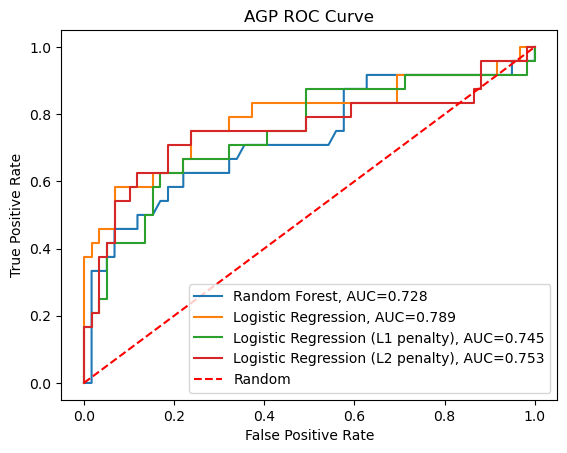

In [365]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv, penalty='l1', solver='liblinear')  

agp_probs1 = cross_val_predict(model, X_agp, y_agp.values.ravel(), cv=cv, method='predict_proba')
agp_probs1 = agp_probs1[:, 1]

agp_fpr1, agp_tpr1, _ = roc_curve(y_agp, agp_probs1, pos_label='Positive')
agp_auc1 = auc(agp_fpr1, agp_tpr1)

plt.plot(a_rf_fpr, a_rf_tpr, label='Random Forest, AUC='+str(round(a_rf_auc, 3)))
plt.plot(a_lr_fpr, a_lr_tpr, label='Logistic Regression, AUC='+str(round(a_lr_auc, 3)))
plt.plot(agp_fpr1, agp_tpr1, label='Logistic Regression (L1 penalty), AUC='+str(round(agp_auc1, 3)))
plt.plot(agp_fpr, agp_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(agp_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AGP ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_pca_agp.png')
plt.show()

In [366]:
# for dna

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)          
c_values = [0.001, 0.01, 0.1, 1]

history=[]

pointer = 1
for train_index, test_index in cv.split(X_dna, y_dna):                          
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv.get_n_splits()))
    x_train, x_test = X_dna.loc[train_index], X_dna.loc[test_index]
    y_train, y_test = y_dna.loc[train_index], y_dna.loc[test_index]
    
    model = LogisticRegressionCV(Cs = c_values, cv=cv, scoring='roc_auc', solver='liblinear', penalty='l1')     
    model.fit(x_train, y_train)

    pred_test = model.predict_proba(x_test)
    pred_training = model.predict_proba(x_train)
    
    auc_train = roc_auc_score(y_train, pred_training[:, 1])                   
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    
    print("""
    C value: {}
    
    Training
        AUC: {}
    Test
        AUC: {}
  
    """.format(
        model.C_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1
    
print('Overall test performance: {:.2f}'.format(np.mean(history)))


NestedCV: 1 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9909090909090909
    Test
        AUC: 0.5833333333333334
  
    

NestedCV: 2 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9836363636363636
    Test
        AUC: 1.0
  
    

NestedCV: 3 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.978114478114478
    Test
        AUC: 1.0
  
    

NestedCV: 4 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9834710743801652
    Test
        AUC: 0.5
  
    

NestedCV: 5 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9719008264462811
    Test
        AUC: 1.0
  
    

NestedCV: 6 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9818181818181818
    Test
        AUC: 1.0
  
    

NestedCV: 7 of outer fold 10

    C value: [0.1]
    
    Training
        AUC: 0.9702479338842975
    Test
        AUC: 0.6666666666666667
  
    

NestedCV: 8 of outer fold 10

  

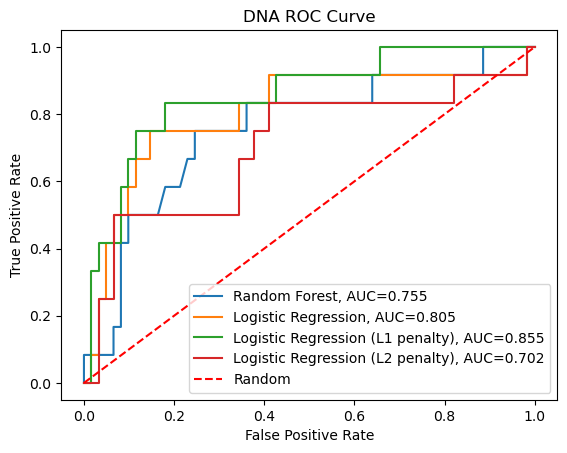

In [367]:
model = LogisticRegressionCV(Cs = c_values, scoring='roc_auc', cv=cv, solver='liblinear', penalty='l1')  

dna_probs1 = cross_val_predict(model, X_dna, y_dna.values.ravel(), cv=cv, method='predict_proba')
dna_probs1 = dna_probs1[:, 1]

dna_fpr1, dna_tpr1, _ = roc_curve(y_dna, dna_probs1, pos_label='Positive')
dna_auc1 = auc(dna_fpr1, dna_tpr1)

plt.plot(d_rf_fpr, d_rf_tpr, label='Random Forest, AUC='+str(round(d_rf_auc, 3)))
plt.plot(d_lr_fpr, d_lr_tpr, label='Logistic Regression, AUC='+str(round(d_lr_auc, 3)))
plt.plot(dna_fpr1, dna_tpr1, label='Logistic Regression (L1 penalty), AUC='+str(round(dna_auc1, 3)))
plt.plot(dna_fpr, dna_tpr, label='Logistic Regression (L2 penalty), AUC='+str(round(dna_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNA ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_pca_dna.png')
plt.show()